#**Python Code Implementation of t-SNE on MNIST Dataset**


#Step 1 :
##Importing Necessary Modules.

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# Step 2 :
## load the MNIST_test dataset into pandas dataframe

In [2]:
# Reading the data using pandas
df = pd.read_csv('mnist_test.csv')

# print first five rows of df
print(df.head(4))

   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      7    0    0    0    0    0    0    0    0    0  ...    0.0    0.0   
1      2    0    0    0    0    0    0    0    0    0  ...    0.0    0.0   
2      1    0    0    0    0    0    0    0    0    0  ...    0.0    0.0   
3      0    0    0    0    0    0    0    0    0    0  ...    0.0    0.0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  

[4 rows x 785 columns]


In [3]:
# Drop the label feature and
# store the pixel data in d.
d = df.drop('label', axis=1)

# Step 3  :
## Standardize the data

In [6]:
# Data-preprocessing: Standardizing the data
Standardizing_data = StandardScaler().fit_transform(df)
print(Standardizing_data.shape)

(4624, 785)


# Step 4 :  Reduce the columns data to 2 dimensions




In [7]:
# Picking the top 1000 points as TSNE
# takes a lot of time for 15K points
data_1000 = Standardizing_data[:1000, :]

In [8]:
# Assuming 'label' column exists in the original dataframe 'df'
label = df['label']
# Extract labels from the original dataframe
labels_1000 = label[:1000]

# Step 5 :
## define the model

In [11]:
# configuring the parameters
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations
# for the optimization = 1000
model = TSNE(n_components=2, random_state=0)

# Step 6 :
## Fit the model

In [13]:
tsne_data = model.fit_transform(data_1000)
# creating a new data frame which
# help us in plotting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data = tsne_data,
                       columns = ("Dim_1", "Dim_2", "label"))



# Step 7 :
##  Plotting the result

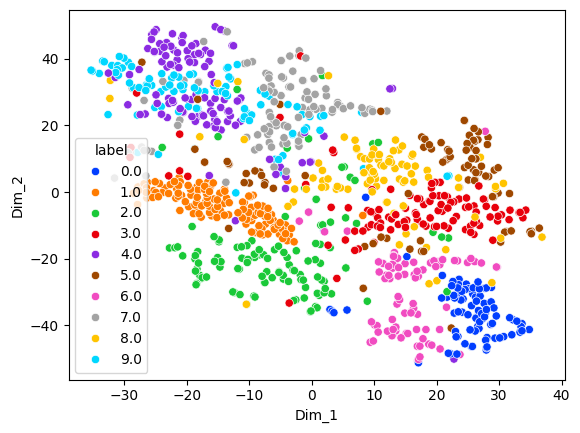

In [16]:
# Plotting the result of tsne
sns.scatterplot(data = tsne_df, x='Dim_1', y='Dim_2', hue='label',
               palette='bright')
plt.show()


#**Well Done**